In [65]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm as anova

def EDA_plots(df, features = df.columns, targets = ['SalePrice']):
    # can pass features = [list of features] and targets = [list of targets]
    # to get plots and regressions of different variables
    for feature in features:
        for target in targets:
            if feature != target and feature != 'PID':
                print('feature: ',feature)
                scatter = px.scatter(x = df[f'{feature}'], y = df[f'{target}'])
                scatter.update_layout(
                    title={
                        'text': f'Scatterplot, {feature} vs {target}',
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    xaxis_title = f'{feature}',
                    yaxis_title = f'{target}'
                )
                scatter.show()
                hist = px.histogram(x = df[f'{feature}'])
                hist.update_layout(
                    title={
                        'text': f'Distribution of {feature}',
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    xaxis_title = f'{feature}',
                    yaxis_title = 'Frequency'
                )
                hist.show()
                box = px.box(x = df[f'{feature}'], y = df[f'{target}'])
                box.update_layout(
                    title={
                        'text': f'Boxplot, {feature} vs {target}',
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                    xaxis_title = f'{feature}',
                    yaxis_title = 'Frequency'
                )
                box.show()
                temp = df[df[f'{feature}'].isna() == False].reset_index(drop = True)
                if type(temp.loc[0, f'{feature}']) != str:
                    price_corr = temp[f'{feature}'].corr(temp[f'{target}'])
                    print(f'Correlation between {feature} and {target} is {price_corr}')
                    linreg = stats.linregress(temp[f'{feature}'], temp[f'{target}'] )
                    print(linreg)
                    print('r^2 = ',linreg.rvalue**2)
                if type(temp.loc[0, f'{feature}']) == str:
                    # this is to see full multiple regression on each value of categorical variable
                    # can comment this out
                    fit = ols(f'{target} ~ C({feature})', data=temp).fit()
                    print(fit.summary())
                    # this is to see anova on whether any value of categorical variable is significantly different
                    #anova_table = anova(fit, typ=2)
                    #print(anova_table)
            print()

In [2]:
df = pd.read_csv('./../person1data.csv', index_col = 0)

In [3]:
df = df.reset_index(drop = True)

In [59]:
df[df['LotFrontage'] > 150]

PID  SalePrice  LotFrontage  LotArea LotShape LandSlope  \
74    527108090     274725        168.0    23257      IR3       Gtl   
527   527226040     155000        195.0    41600      IR1       Gtl   
536   923251180     131000        160.0    20000      Reg       Gtl   
582   527175130     154204        160.0    18160      Reg       Gtl   
981   535427070     242000        313.0    27650      IR2       Mod   
1146  528321010     403000        174.0    15138      IR1       Gtl   
1626  906475170     279000        155.0    20064      IR1       Sev   
1703  527225035     164000        152.0    12134      IR1       Mod   
1720  903430130      52500        153.0     4118      IR1       Mod   
2008  923202220     130000        200.0    43500      Reg       Gtl   

     LandContour MSZoning Street Alley Neighborhood LotConfig Condition1  \
74           HLS       RL   Pave   NaN      Gilbert   CulDSac       Norm   
527          Lvl       RL   Pave   NaN      Gilbert       FR2       Norm   
536          Lvl       RL   Pave   NaN      Mitchel    Inside       Norm   
582          Lvl       RL   Grvl   NaN      Gilbert    Inside       Norm   
981          HLS       RL   Pave   NaN        NAmes    Inside       PosA   
1146         Lvl       RL   Pave   NaN      NoRidge    Inside       Norm   
1626         Low       RL   Pave   NaN      ClearCr    Inside       Norm   
1703         Bnk       RL   Pave   NaN      Gilbert    Inside       Norm   
1720         Bnk       RM   Pave  Grvl      OldTown    Corner      Feedr   
2008         Lvl       RL   Pave   NaN      Mitchel    Inside     Artery   

     Condition2 Foundation Utilities Heating HeatingQC CentralAir Electrical  
74         Norm      PConc    AllPub    GasA        Ex          Y      SBrkr  
527        Norm     CBlock    AllPub    GasW        TA          Y      SBrkr  
536        Norm     CBlock    AllPub    GasA        Ex          Y      SBrkr  
582        Norm     CBlock    AllPub    GasA        Fa          Y      SBrkr  
981        Norm     CBlock    AllPub    GasA        Ex          Y      SBrkr  
1146       Norm      PConc    AllPub    GasA        Ex          Y      SBrkr  
1626       Norm     CBlock    AllPub    GasA        Ex          Y      SBrkr  
1703       Norm       Wood    AllPub    GasA        Gd          Y      SBrkr  
1720       Norm     CBlock    AllPub    Grav        Fa          N      FuseA  
2008       Norm     CBlock    AllPub    GasA        Ex          Y      SBrkr

In [76]:
df[df['LotArea'] > 50000]

PID  SalePrice  LotFrontage  LotArea LotShape LandSlope  \
104    906426195     240000          NaN    53107      IR2       Mod   
195    905401060     256000          NaN    53227      IR1       Mod   
249    906426060     277000          NaN   159000      IR2       Sev   
347    533350050     385000         68.0    50271      IR1       Gtl   
355    916176125     375000        150.0   215245      IR3       Sev   
568   1007100110     103000          NaN    56600      IR1       Gtl   
615    527216080     591587         52.0    51974      IR1       Gtl   
802    527216070     538000         47.0    53504      IR2       Mod   
1271   905301050     302000          NaN   115149      IR2       Sev   
1634   916125425     228950          NaN   164660      IR1       Sev   
1955   906475200     280000         62.0    70761      IR1       Mod   
2172   916125360     160000          NaN    57200      IR1       Sev   

     LandContour MSZoning Street Alley Neighborhood LotConfig Condition1  \
104          Low       RL   Pave   NaN      ClearCr    Corner      Feedr   
195          Low       RL   Pave   NaN      ClearCr   CulDSac       Norm   
249          Low       RL   Pave   NaN      ClearCr   CulDSac       Norm   
347          Low       RL   Pave   NaN      Veenker    Inside       Norm   
355          Low       RL   Pave   NaN       Timber    Inside       Norm   
568          Low  I (all)   Pave   NaN       IDOTRR    Inside       Norm   
615          Lvl       RL   Pave   NaN      StoneBr   CulDSac       PosN   
802          HLS       RL   Pave   NaN      StoneBr   CulDSac       Norm   
1271         Low       RL   Pave   NaN      ClearCr   CulDSac       Norm   
1634         HLS       RL   Grvl   NaN       Timber    Corner       Norm   
1955         Low       RL   Pave   NaN      ClearCr    Inside       Norm   
2172         Bnk       RL   Pave   NaN       Timber    Inside       Norm   

     Condition2 Foundation Utilities Heating  HeatingQC CentralAir Electrical  
104        Norm      PConc    AllPub    GasA          5          Y      SBrkr  
195        Norm     CBlock    AllPub    GasA          5          Y      SBrkr  
249        Norm     CBlock    AllPub    GasA          4          Y      SBrkr  
347        Norm     CBlock    AllPub    GasA          4          Y      SBrkr  
355        Norm     CBlock    AllPub    GasW          3          Y      SBrkr  
568        Norm     BrkTil    AllPub    GasA          5          Y      SBrkr  
615        Norm      PConc    AllPub    GasA          5          Y      SBrkr  
802        Norm      PConc    AllPub    GasA          5          Y      SBrkr  
1271       Norm     CBlock    AllPub    GasA          3          Y      SBrkr  
1634       Norm     CBlock    AllPub    GasA          5          Y      SBrkr  
1955       Norm     CBlock    AllPub    GasA          3          Y      SBrkr  
2172       Norm     CBlock    AllPub    GasA          3          Y      SBrkr

In [74]:
Cond_dict={
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'NA':0,
        '0':0
}
df.loc[df['HeatingQC'].isna(),'HeatingQC']='0'
df['HeatingQC']=df['HeatingQC'].map(lambda x: Cond_dict[x])

In [79]:
lot_shape_dict = {
    'Reg':'Regular',
    'IR1':'Slightly irregular',
    'IR2':'Irregular',
    'IR3': 'Irregular'
}
df['LotShape'] = df['LotShape'].map(lambda x: lot_shape_dict[x] if x in lot_shape_dict else x)

In [80]:
df['LotShape'].value_counts()

Regular               1641
Slightly irregular     855
Irregular               84
Name: LotShape, dtype: int64

In [84]:
land_slope_dict = {
    'Gtl':'Gentle',
    'Mod':'Moderate-severe',
    'Sev':'Moderate-severe'
}
df['LandSlope'] = df['LandSlope'].map(lambda x: land_slope_dict[x] if x in land_slope_dict else x)

In [85]:
df['LandSlope'].value_counts()

Gentle             2458
Moderate-severe     122
Name: LandSlope, dtype: int64

In [92]:
alley_dict = {
    'Pave':'Paved',
    'Grvl':'Gravel',
    'No alley access' : 'No alley access'
}
df.loc[df['Alley'].isna(),'Alley'] = 'No alley access'
df['Alley'] = df['Alley'].map(lambda x: alley_dict[x] if x in alley_dict else x)

In [93]:
df['Alley'].value_counts()

No alley access    2412
Gravel              105
Paved                63
Name: Alley, dtype: int64

In [96]:
df['LandContour'].value_counts()

Level                                          2337
Hillside (downward slope on both sides)          96
Banked (rise from street level to building)      95
Depression (upward slope on both sides)          52
Name: LandContour, dtype: int64

In [95]:
LandContour_dict = {
    'Lvl':'Level',
    'Bnk':'Banked (rise from street level to building)',
    'HLS' : 'Hillside (downward slope on both sides)',
    'Low' : 'Depression (upward slope on both sides)'
}

df['LandContour'] = df['LandContour'].map(lambda x: LandContour_dict[x] if x in LandContour_dict else x)

In [100]:
df['MSZoning'].value_counts()

Residential, low-density       2008
Residential, medium-density     418
Residential, village            113
Residential, high-density        21
Nonresidential                   20
Name: MSZoning, dtype: int64

In [99]:
MSZoning_dict = {
    'RL':'Residential, low-density',
    'RM':'Residential, medium-density',
    'FV' : 'Residential, village',
    'RH' : 'Residential, high-density',
    'C (all)' : 'Nonresidential',
    'I (all)' : 'Nonresidential',
    'A (agr)' : 'Nonresidential'
}

df['MSZoning'] = df['MSZoning'].map(lambda x: MSZoning_dict[x] if x in MSZoning_dict else x)

In [164]:
def combine_condition_columns(df, factors):
    for i in range(1, df.shape[0]):
        for factor in factors:
            if df.loc[i, 'Condition1'] == factor or df.loc[i, 'Condition2'] == factor:
                df.loc[i, f'{factor}'] = '1'
            else:
                df.loc[i, f'{factor}'] = '0'
    return df

In [137]:
loc_factors = ['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe']

In [181]:
df = combine_condition_columns(df, loc_factors)

C:\Users\fayma\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fayma\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
df.rename(columns={
    'Norm' : 'LF_Normal',
    'RRAn' : 'LF_Adjacent_NS_RR',
    'PosN' : 'LF_Near_Positive_Feature',
    'Artery' : 'LF_Adjacent_Arterial_St',
    'RRAe' : 'LF_Adjacent_EW_RR',
    'Feedr' : 'LF_Adjacent_Feeder_St',
    'PosA' : 'LF_Adjacent_Postive_Feature',
    'RRNn' : 'LF_Near_NS_RR',
    'RRNe' : 'LF_Near_EW_RR'}, inplace=True)

C:\Users\fayma\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [190]:
df['Utilities'].value_counts()

EGWS                    2578
EGW with septic tank       2
Name: Utilities, dtype: int64

In [187]:
Utilities_dict = {
    'AllPub':'EGWS',
    'NoSewr':'EGW with septic tank'
}

df['Utilities'] = df['Utilities'].map(lambda x: Utilities_dict[x] if x in Utilities_dict else x)

<ipython-input-187-5c2d9e437f6a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [195]:
df['Heating'].value_counts()

Gas-powered forced-air heating     2540
Gas-powered water/steam heating      25
Other                                15
Name: Heating, dtype: int64

In [194]:
Heating_dict = {
    'GasA':'Gas-powered forced-air heating',
    'GasW':'Gas-powered water/steam heating',
    'Grav' : 'Other',
    'OthW' : 'Other',
    'Floor' : 'Other',
    'Wall' : 'Other'
}

df['Heating'] = df['Heating'].map(lambda x: Heating_dict[x] if x in Heating_dict else x)

<ipython-input-194-7e11d7e4c080>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
df['Electrical'].value_counts()

Standard circuit breakers, all Romex wiring    2365
>60 Amp fuse box, all Romex wiring              168
60 Amp fuse box, Romex or older wiring           46
Name: Electrical, dtype: int64

In [200]:
Electrical_dict = {
    'SBrkr': 'Standard circuit breakers, all Romex wiring',
    'FuseA': '>60 Amp fuse box, all Romex wiring',
    'FuseF' : '60 Amp fuse box, Romex or older wiring',
    'FuseP' : '60 Amp fuse box, Romex or older wiring'
}

df['Electrical'] = df['Electrical'].map(lambda x: Electrical_dict[x] if x in Electrical_dict else x)

<ipython-input-200-5caa4e02fe1b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
EDA_plots(df, features = df.columns[0:5])



feature:  LotFrontage


Correlation between LotFrontage and SalePrice is 0.3585770737824612
LinregressResult(slope=1227.197164525392, intercept=92542.34894974912, rvalue=0.35857707378246123, pvalue=2.787391670842792e-65, stderr=69.45257831119562, intercept_stderr=5015.841197341647)
r^2 =  0.12857751784239266

feature:  LotArea


Correlation between LotArea and SalePrice is 0.2744434573344542
LinregressResult(slope=2.533770018681036, intercept=152417.48176252644, rvalue=0.2744434573344542, pvalue=8.30301952439037e-46, stderr=0.17485126235142173, intercept_stderr=2269.2907005287334)
r^2 =  0.07531921127368837

feature:  LotShape


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     133.6
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           6.39e-56
Time:                        17:41:07   Log-Likelihood:                -32495.
No. Observations:                2580   AIC:                         6.500e+04
Df Residuals:                    2577   BIC:                         6.501e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [101]:
EDA_plots(df, features = df.columns[5:10])

feature:  LandSlope


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     16.03
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           6.40e-05
Time:                        16:52:37   Log-Likelihood:                -32615.
No. Observations:                2580   AIC:                         6.523e+04
Df Residuals:                    2578   BIC:                         6.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     28.71
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           2.97e-18
Time:                        16:52:37   Log-Likelihood:                -32580.
No. Observations:                2580   AIC:                         6.517e+04
Df Residuals:                    2576   BIC:                         6.519e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     84.48
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           1.70e-67
Time:                        16:52:37   Log-Likelihood:                -32463.
No. Observations:                2580   AIC:                         6.494e+04
Df Residuals:                    2575   BIC:                         6.497e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.579
Date:                Wed, 18 Aug 2021   Prob (F-statistic):             0.0104
Time:                        16:52:37   Log-Likelihood:                -32619.
No. Observations:                2580   AIC:                         6.524e+04
Df Residuals:                    2578   BIC:                         6.525e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.174e+05   2.37e+0

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     26.53
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           3.94e-12
Time:                        16:52:38   Log-Likelihood:                -32596.
No. Observations:                2580   AIC:                         6.520e+04
Df Residuals:                    2577   BIC:                         6.522e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [55]:
EDA_plots(df, features = df.columns[10:15])

feature:  Neighborhood


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     120.2
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:27:18   Log-Likelihood:                -31564.
No. Observations:                2580   AIC:                         6.318e+04
Df Residuals:                    2552   BIC:                         6.335e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     13.88
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           3.32e-11
Time:                        17:27:18   Log-Likelihood:                -32595.
No. Observations:                2580   AIC:                         6.520e+04
Df Residuals:                    2575   BIC:                         6.523e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     15.25
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           4.48e-22
Time:                        17:27:19   Log-Likelihood:                -32563.
No. Observations:                2580   AIC:                         6.514e+04
Df Residuals:                    2571   BIC:                         6.520e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.29

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.313
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.95e-11
Time:                        17:27:19   Log-Likelihood:                -32590.
No. Observations:                2580   AIC:                         6.520e+04
Df Residuals:                    2572   BIC:                         6.524e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.30

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     187.6
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          9.30e-171
Time:                        17:27:19   Log-Likelihood:                -32222.
No. Observations:                2580   AIC:                         6.446e+04
Df Residuals:                    2574   BIC:                         6.449e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [202]:
EDA_plots(df, features = df.columns[15:20])

feature:  Utilities


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.995
Date:                Wed, 18 Aug 2021   Prob (F-statistic):             0.0836
Time:                        18:00:21   Log-Likelihood:                -32621.
No. Observations:                2580   AIC:                         6.525e+04
Df Residuals:                    2578   BIC:                         6.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             8.631e+04 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     10.07
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           4.40e-05
Time:                        18:00:21   Log-Likelihood:                -32613.
No. Observations:                2580   AIC:                         6.523e+04
Df Residuals:                    2577   BIC:                         6.525e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Correlation between HeatingQC and SalePrice is 0.43584970747852486
LinregressResult(slope=34204.59651334623, intercept=36548.04837850478, rvalue=0.4358497074785248, pvalue=4.1457707245547e-120, stderr=1391.0993805781577, intercept_stderr=5906.889157655911)
r^2 =  0.18996496750911565

feature:  CentralAir


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     183.4
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           2.01e-40
Time:                        18:00:21   Log-Likelihood:                -32534.
No. Observations:                2580   AIC:                         6.507e+04
Df Residuals:                    2578   BIC:                         6.508e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.036e+05   5679

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     77.17
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           2.82e-33
Time:                        18:00:22   Log-Likelihood:                -32535.
No. Observations:                2579   AIC:                         6.508e+04
Df Residuals:                    2576   BIC:                         6.509e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [186]:
EDA_plots(df, features = df.columns[20:29])

feature:  LF_Normal


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.328
Date:                Wed, 18 Aug 2021   Prob (F-statistic):              0.249
Time:                        17:42:43   Log-Likelihood:                -32610.
No. Observations:                2579   AIC:                         6.522e+04
Df Residuals:                    2577   BIC:                         6.523e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.953e+05    1.5e+0

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     38.54
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           6.22e-10
Time:                        17:42:44   Log-Likelihood:                -32591.
No. Observations:                2579   AIC:                         6.519e+04
Df Residuals:                    2577   BIC:                         6.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     35.58
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           2.78e-09
Time:                        17:42:44   Log-Likelihood:                -32592.
No. Observations:                2579   AIC:                         6.519e+04
Df Residuals:                    2577   BIC:                         6.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01331
Date:                Wed, 18 Aug 2021   Prob (F-statistic):              0.908
Time:                        17:42:44   Log-Likelihood:                -32610.
No. Observations:                2579   AIC:                         6.522e+04
Df Residuals:                    2577   BIC:                         6.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     24.09
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           9.79e-07
Time:                        17:42:44   Log-Likelihood:                -32598.
No. Observations:                2579   AIC:                         6.520e+04
Df Residuals:                    2577   BIC:                         6.521e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.840
Date:                Wed, 18 Aug 2021   Prob (F-statistic):            0.00897
Time:                        17:42:44   Log-Likelihood:                -32607.
No. Observations:                2579   AIC:                         6.522e+04
Df Residuals:                    2577   BIC:                         6.523e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     18.94
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           1.40e-05
Time:                        17:42:45   Log-Likelihood:                -32601.
No. Observations:                2579   AIC:                         6.521e+04
Df Residuals:                    2577   BIC:                         6.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.08253
Date:                Wed, 18 Aug 2021   Prob (F-statistic):              0.774
Time:                        17:42:45   Log-Likelihood:                -32610.
No. Observations:                2579   AIC:                         6.522e+04
Df Residuals:                    2577   BIC:                         6.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.781e+

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5475
Date:                Wed, 18 Aug 2021   Prob (F-statistic):              0.459
Time:                        17:42:45   Log-Likelihood:                -32610.
No. Observations:                2579   AIC:                         6.522e+04
Df Residuals:                    2577   BIC:                         6.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.781e+

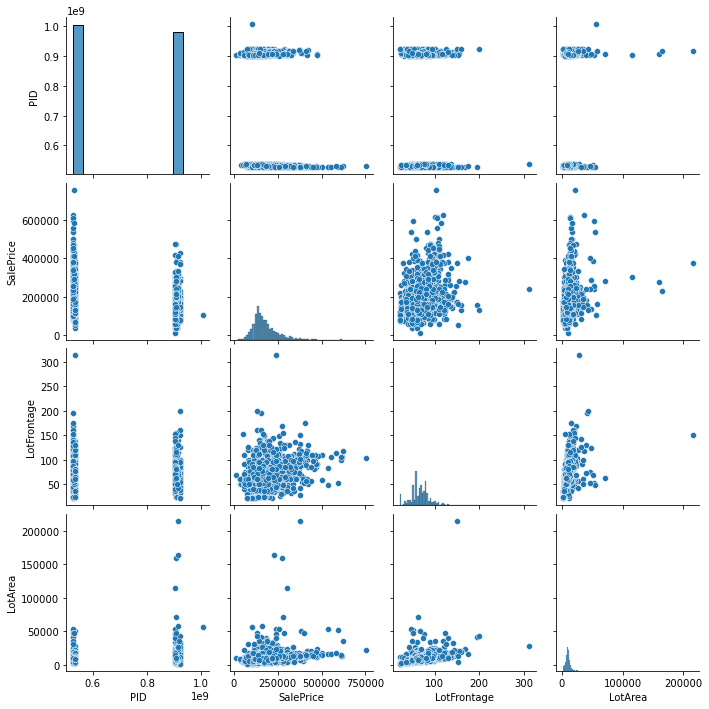

In [57]:
import seaborn
import matplotlib.pyplot as plt
seaborn.pairplot(df)
plt.show()